### Pre: Vector Generation

In [3]:
from sage.matrix.berlekamp_massey import berlekamp_massey
import random
from matplotlib import pyplot as plt

In [4]:
def random_vector(n, f):
    return vector(f, [f.random_element() for _ in range(n)])

def sparse_vector(k, n, f):
    # k is number of non-zero elements
    indices = random.sample(range(n), k)
    v = [f(0)] * n
    for i in indices:
        v[i] = f.random_element()
    return vector(f, v)

def structured_vector(n, f):
    return vector(f, [1]*n) 

def generate_vectors(category, n, f):
    if category == "Random":
        return random_vector(n, f), random_vector(n, f)
    elif category == "Sparse":
        return sparse_vector(1, n, f), sparse_vector(1, n, f)
    elif category == "Structured":
        return structured_vector(n, f), structured_vector(n, f)
    else:
        raise ValueError("Unknown category")

In [5]:
def minpoly_recovery_success(A, f, trials=1000):
    n = A.nrows() # dimension of A
    success_rates = {"Random" : 0, 
                    "Sparse" : 0, 
                    "Structured" : 0 }
    min_poly = A.minpoly() # actual min poly
    for category in success_rates.keys():
        succeeded = 0
        for _ in range(trials):
            u, v = generate_vectors(category, n, f)
            kappa = [u.dot_product((A^i)*v) for i in range(2*n)] # krylov sequence
            mu = berlekamp_massey(kappa) 
            if mu == min_poly: 
                succeeded += 1
        success_rates[category] = f'{float(succeeded * 100/trials):.2f}%'
    return success_rates

In [6]:
def plot(title):
    labels = list(test_data.keys())
    random_vals = [float(test_data[label]['Random'].strip('%')) for label in labels]
    bars = plt.bar(labels, random_vals, color='steelblue')
    plt.ylabel('Random Vectors\' Success Rate (%)')
    plt.title(title)
    plt.ylim(0, 110)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.1f}%', 
                 ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

### 1. Varying matrix size
Fixed:
- Field: GF(31)
- Matrix type: diagonal

Varied:
- Case 1: all distinct eigenvalues, case 2: all same eigenvalues
- Matrix dimension: 3, 15, 30
- Vector types: random, sparse, structured

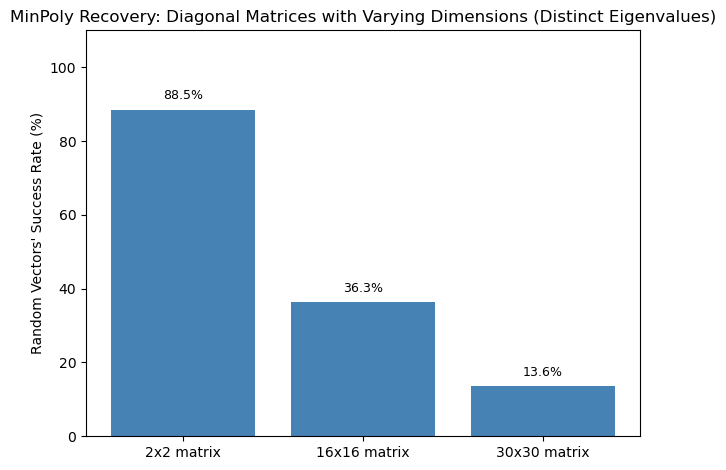

In [7]:
# Test 1: Varying field size (n)
test_data = {}
t1_dims = [2, 16, 30]
def test10(n):
    test_name = f'{n}x{n} matrix'
    f = GF(31) # Fixed field
    A = diagonal_matrix(f, [i for i in range(1, n + 1)])
    success_rates = minpoly_recovery_success(A, f)
    test_data.update({test_name : success_rates})
    return test_data[test_name]
for n in t1_dims:
    test10(n)
plot('MinPoly Recovery: Diagonal Matrices with Varying Dimensions (Distinct Eigenvalues)')

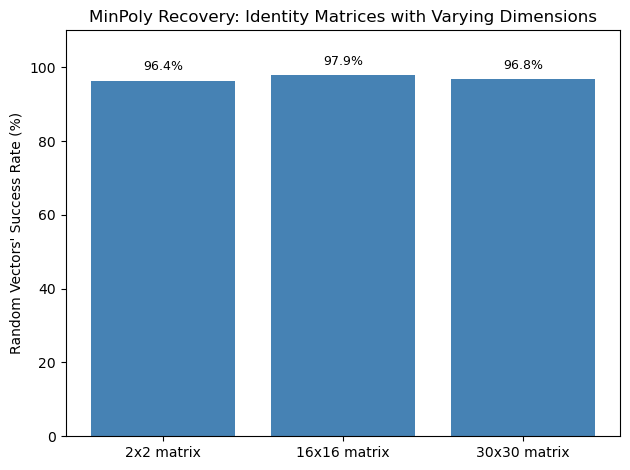

In [8]:
test_data = {}
def test11(n):
    test_name = f'{n}x{n} matrix'
    f = GF(31) # Fixed field
    A = diagonal_matrix(f, [1] * (n))
    success_rates = minpoly_recovery_success(A, f)
    test_data.update({test_name : success_rates})
    return test_data[test_name]
for n in t1_dims:
    test11(n)
plot('MinPoly Recovery: Identity Matrices with Varying Dimensions')

{1003: {'Random': '81.30%', 'Sparse': '0.00%', 'Structured': '100.00%'}, 1015: {'Random': '37.70%', 'Sparse': '0.00%', 'Structured': '100.00%'}, 1030: {'Random': '14.40%', 'Sparse': '0.00%', 'Structured': '100.00%'}, 1103: {'Random': '96.00%', 'Sparse': '31.70%', 'Structured': '100.00%'}, 1115: {'Random': '97.90%', 'Sparse': '5.80%', 'Structured': '100.00%'}, 1130: {'Random': '96.40%', 'Sparse': '3.20%', 'Structured': '100.00%'}}

- More distinct eigenvalues -> less success rate
- Success rate seems to be independent from matrix size

### 2. Varying duplicities
Fixed:
- Field: GF(31)
- Matrix type: diagonal
- Matrix dimension: 10

Varied:
- Case 1: m duplicities, the rest distinct (m <= 10)
- Case 2: m duplicities of $\lambda_1$, 10 - m duplicities of $\lambda_2$
- Vector types: random, sparse, structured

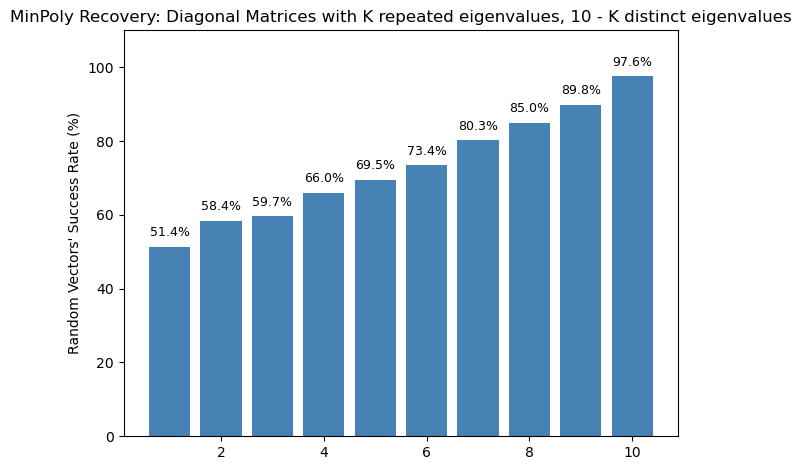

In [12]:
# Test 2
test_data = {}
def test20(n):
    test_name = n
    f = GF(31) # Fixed field
    A = diagonal_matrix(f, [1] * n + [i for i in range(2, 12 - n)])
    # print(A)
    success_rates = minpoly_recovery_success(A, f)
    test_data.update({test_name : success_rates})
    return test_data[test_name]
for n in range(1, 11): 
    test20(n)
plot('MinPoly Recovery: Diagonal Matrices with K repeated eigenvalues, 10 - K distinct eigenvalues')

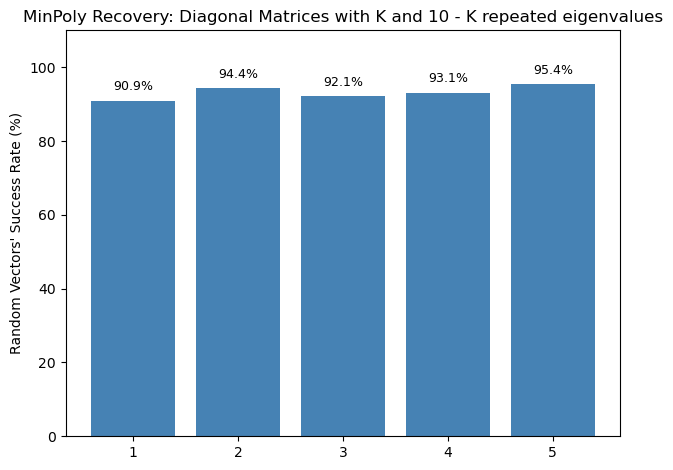

In [16]:
test_data = {}
def test21(n):
    test_id = n
    f = GF(31) # Fixed field
    A = diagonal_matrix(f, [1] * n + [2] * (10 - n))
    # print(A)
    success_rates = minpoly_recovery_success(A, f)
    test_data.update({test_id : success_rates})
    return test_data[test_id]
for n in range(1,6):
    test21(n)
plot('MinPoly Recovery: Diagonal Matrices with K and 10 - K repeated eigenvalues')

### 3. Different eigenvalue ranges
Fixed:
- Field: GF(31)
- Matrix type: diagonal
- Matrix dimension: 15

Varied:
- Range: 1 -> 15, 16 -> 30
- Vector types: random, sparse, structured

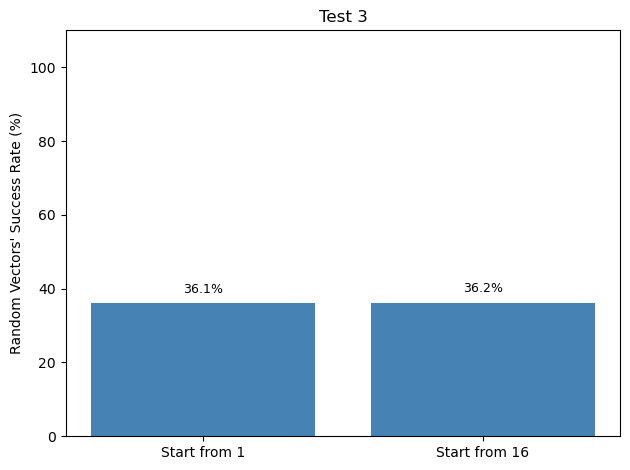

In [17]:
# Test 3
test_data = {}
def test30(start):
    test_name = f'Start from {start}'
    f = GF(31) # Fixed field
    A = diagonal_matrix(f, [i for i in range(start, 15 + start)])
    success_rates = minpoly_recovery_success(A, f)
    test_data.update({test_name : success_rates})
    return test_data[test_name]
test30(1)
test30(16)
plot('Test 3')

### 4. Varying field size
Fixed:
- Matrix: diag(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

Varied:
- Field: GF(2), GF(7), GF(31), GF(997)
- Vector types: random, sparse, structured

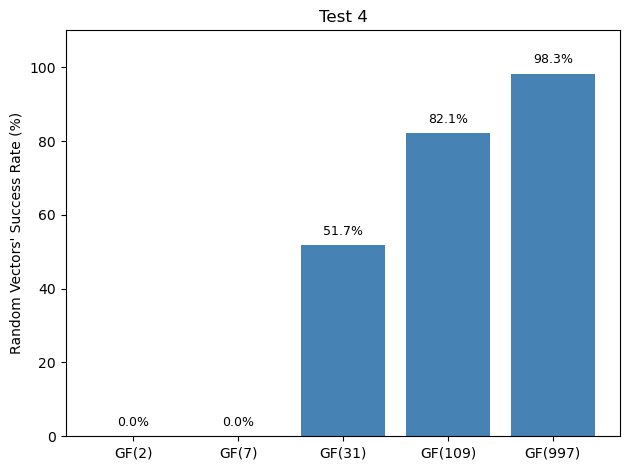

In [18]:
field_orders = [2, 7, 31, 109, 997]
test_data = {}
def test40(order):
    test_name = f'GF({order})'
    f = GF(order)
    A = diagonal_matrix(f, [i for i in range(1, 11)])
    success_rates = minpoly_recovery_success(A, f)
    test_data.update({test_name : success_rates})
    return test_data[test_name]
for order in field_orders:
    test40(order)
plot('Test 4')